### Readme

- This is a personal project by Ronald Luo. Feedback is welcome.
- This demo aims to cover a general understanding of the machine learning modeling process.
- The code in this demo may not be the most elegant but it can do the job.

- Some useful courses
   - *Coursera: Applied Machine Learning by UM*
   - *Coursera: Python for Statistic by UM*
   - *Khan Academy: statistic and probability*
- A book helps me a lot  - *Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow*



### This notebook has 5 parts. 


#### Part 0: Prep  
- Import necessary libraries
- Load dataset

####  Part 1: An Overview of the dataset
- Basic information
- Get insights through visualization

#### **Part 2: Preprocessing and Features Engineering**
- Remove redundant and irrelevant Features
- Handle outliners
- Handle missing values
- Feature transformation

#### **Part 3: Algorithms**
- Train test split
- Data scaling
- Evaluate Model Performance
- K-fold
- Confustion Matrix (Accuracy, Recall, Precision)

## Part 0: Prep

In this part, we will first import necessary libraries, and load the data. 

 - numpy: used for array transformation / calculation 
 - seaborn & matplotlib: used for data visualisation
 - scipy: used for statiscal analysis
 - pandas: used for data-frame and transformation

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

titanic = sns.load_dataset('titanic')
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Titanic dataset has both categorical and numerical data. The following is the descrption of this dataset from the web: 


- survival:	Survival	0 = No, 1 = Yes
- pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex:	Sex	
- Age:	Age in years	
- sibsp:	# of siblings / spouses aboard the Titanic	
- parch:	# of parents / children aboard the Titanic	
- ticket:	Ticket number	
- fare:	Passenger fare	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton




## Part 1: An Overview of the dataset


#### 1.1 Basic information 
 - rows and columns
 - mean, standard deviation
 - missing values count


Let's get our hands dirty. Before any modeling, you will want to understand the dataset. 

In [2]:
titanic.shape

(891, 15)

This means that our dataset has 891 rows and 15 columns. We can use the describe function to look at the details.

In [3]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 1.2  Get insights through visualization

Graphs can give us a more clear understanding of the dataset. But before visualizing, we need to think about what kind of graphs we need. For this dataset, first thing come into my mind is the bar chart, group by different categories. And distribution plot.

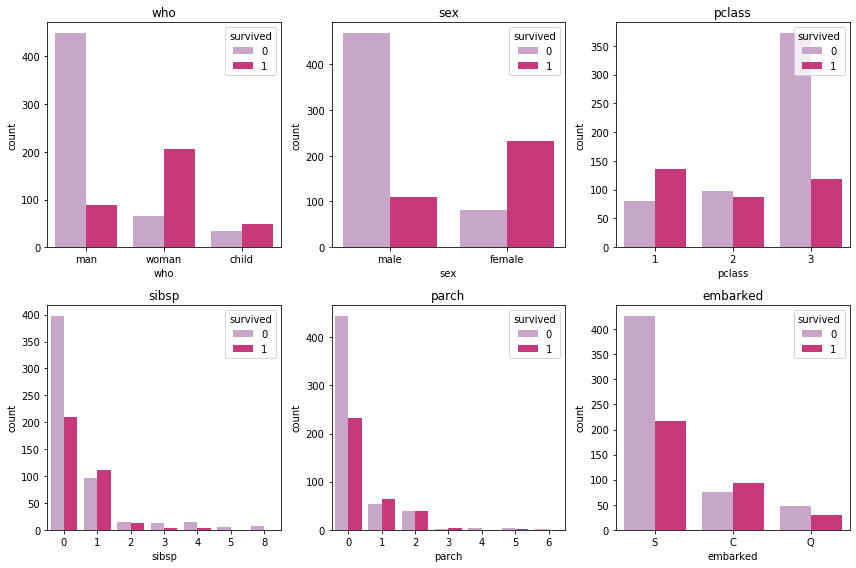

In [4]:
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

#the subplot grid and figure size
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols *4, n_rows*4))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to go through the number of columns 
        ax = axs[r][c] #show there to position each sub plot
        sns.countplot(x = titanic[cols[i]], hue = titanic['survived'], palette = "PuRd", ax=ax)
        ax.set_title(cols[i])
        ax.legend(title = 'survived', loc = 'upper right')

plt.tight_layout()

## Part 2: Features Engineering 


Feature engineering  helps us to build a better model. In this part, we will go over the following steps:

 - Remove Redundant and Irrelevant Features
 - Handle Outliners
 - Handle missing values
 - Feature Transformation
  
 
 

#### 2.1 Remove Redundant and Irrelevant

Take a close look at the Titanic dataset. You will find that some of columns have same information as others. 



- ['alive'] and ['survived'] are the same information but in different format. We will drop the ['alive'] Same for ['pclass'] and ['class']

In [5]:
titanic[['alive', 'survived']]

,alive,survived
0,no,0
1,yes,1
2,yes,1
3,yes,1
4,no,0
...,...,...
886,no,0
887,yes,1
888,no,0
889,yes,1


In [6]:
titanic[['pclass', 'class']]

,pclass,class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third
...,...,...
886,2,Second
887,1,First
888,3,Third
889,1,First


 - ['adult_male'] doesn't provide us a lot of information because if a person is adult or male can be inferred  from other features. Let's drop it.

In [7]:
titanic[['adult_male']]

,adult_male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


- ['embarked'] is just the initial of ['embark_town'], so you may think about dropping one of them. However, another thing we should consider is that, is the location where you embarked will affect your survival rate? Personally i don't think so...let's drop them both here

In [8]:
titanic[['embark_town', 'embarked']]

,embark_town,embarked
0,Southampton,S
1,Cherbourg,C
2,Southampton,S
3,Southampton,S
4,Southampton,S
...,...,...
886,Southampton,S
887,Southampton,S
888,Southampton,S
889,Cherbourg,C


- ['sex'] and ['who'] are similar, except that ['who'] has three values: man, woman, child. Which one we should drop? It is likely that the survival rate of children would be higher. But from the table below we see that in the dataset there are only 83 examples of child, we are not sure if this will affect the model for now. But for the demo purpose, we will drop ['sex'] for now.

In [9]:
titanic[['sex', 'who']]

,sex,who
0,male,man
1,female,woman
2,female,woman
3,female,woman
4,male,man
...,...,...
886,male,man
887,female,woman
888,female,woman
889,male,man


In [10]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64



But what about **['sibsp']** and **['parch']**??  Are they useful? Take a look at the graph first

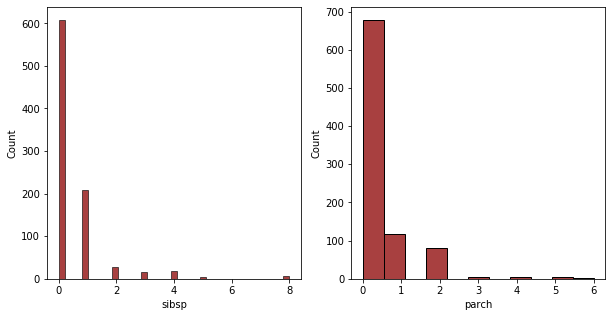

In [11]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (10,5))
sibsp = sns.histplot(titanic, x='sibsp', ax = ax1, color = 'darkred')
parch = sns.histplot(titanic, x='parch', ax = ax2, color = 'darkred')

Turned out that most of the values in both features are zero. What about **['alone']**? Let's covert it into 1 and 0 first.

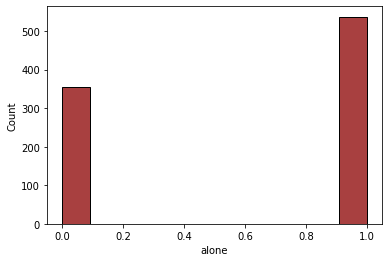

In [12]:
titanic['alone'] = titanic['alone'].astype(int)
alone = sns.histplot(titanic, x='alone', color = 'darkred')

The numbers are quiet balanced, so it seems like a good features. So we will drop ['sibsp'] and ['parch'] instead.

In [13]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,1


In [14]:
df = titanic.drop(['embark_town', 'alive', 'embarked', 'sex', 'class', 'adult_male','sibsp', 'parch'], axis=1)
df.head()

,survived,pclass,age,fare,who,deck,alone
0,0,3,22.0,7.2500,man,NaN,0
1,1,1,38.0,71.2833,woman,C,0
2,1,3,26.0,7.9250,woman,NaN,1
3,1,1,35.0,53.1000,woman,C,0
4,0,3,35.0,8.0500,man,NaN,1


####  2.2 Outliners detection and handling

As mentioned above, outliners and missing values will significantly affect the performance of some algorithms. That is why we need feature transformations. Here we will show the process of treating missing values and outliners. But in the real word practice, there will be quite a lot different methods for doing this.   


In this notebook, we will use the basic approach to detect outliner: graphs. Boxplot and histplot is helpful in this task. In our dataset, we assume that ['fare'] may have outliners, let's start with this first.

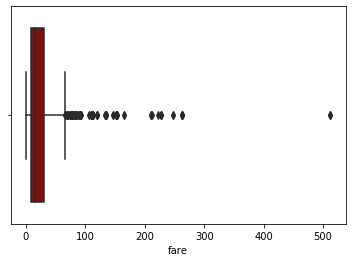

In [15]:
fare_outliner = sns.boxplot(x=titanic['fare'], color = 'darkred')

The boxplot showing us that the distribution of fare is highly right-skewed, most of the fare ranged from 0 ~ 90, but it could be very large going upward. Those black dots are the outliner. A common trick of handling outliner in this situation will be using log function. 

In [16]:
for i in range(len(df)):
    if df.loc[i,'fare'] != 0:
        df.loc[i,'fare'] = np.log10(df.loc[i,'fare'])

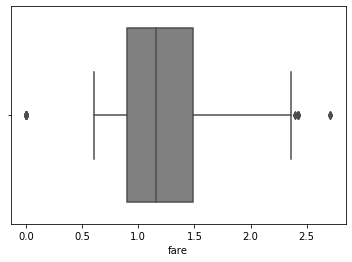

In [17]:
fare_new = sns.boxplot(x=df['fare'], color = 'grey')

Now the boxplot looks better, yet you may argue there are still some outliners here. The fact is in real world outliners will always be there, and we just minimize it as many as possible.

####  2.3 Missing Values Handling

Not surprisingly, there are many different ways to handle missing values, depending on the scenarios. Let's start with analyzing our data

In [18]:
print((df.isnull().sum() / df.isnull().count()).round(2))

survived    0.00
pclass      0.00
age         0.20
fare        0.00
who         0.00
deck        0.77
alone       0.00
dtype: float64


Feature['deck'] has almost 77% missing values, and ['age'] has 20% missing values. 

The proportion of missing['deck'] is too large, and there is no way we can infer the value from other columns. We will simply drop this feature.

Whereas ['age'], we can fill the missing values with mean

In [19]:
df = df.drop(['deck'], axis = 1)
df['age'].fillna((df['age'].mean()), inplace=True)

In [20]:
df.isnull().sum()

survived    0
pclass      0
age         0
fare        0
who         0
alone       0
dtype: int64

#### 2.4 Feature Transformation

We have many categorical data in the dataset, we need to transform them into numbers. You could write a dict to 
map each key to value, but Sklearn has many labelcoders that are more handy. 

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [22]:
labelencoder = LabelEncoder()
df['who'] = labelencoder.fit_transform(df['who'])
df.head()

,survived,pclass,age,fare,who,alone
0,0,3,22.0,0.860338,1,0
1,1,1,38.0,1.852988,2,0
2,1,3,26.0,0.898999,2,1
3,1,1,35.0,1.725095,2,0
4,0,3,35.0,0.905796,1,1


In [23]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_array = enc.fit_transform(df[['who','pclass']]).toarray()
name = enc.get_feature_names(['who', 'pclass'])
enc_df = pd.DataFrame(enc_array, columns = name)
df = df.join(enc_df)

In [24]:
df = df.drop(['pclass','who'], axis = 1)

In [25]:
df.head()

,survived,age,fare,alone,who_0,who_1,who_2,pclass_1,pclass_2,pclass_3
0,0,22.0,0.860338,0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,38.0,1.852988,0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,26.0,0.898999,1,0.0,0.0,1.0,0.0,0.0,1.0
3,1,35.0,1.725095,0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,35.0,0.905796,1,0.0,1.0,0.0,0.0,0.0,1.0


 so far we have done finished the Part 2. The data above will be used to fit our model.

### Part 3: Algorithms

In this part, we will go over the following steps:

 - Train Test Split
 - Data Scaling
 - Train Model
 - Evaluate Model Performance
    - K-fold 
    - Confustion Matrix (Accuracy, Recall, Precision)

In machine learning, there are two types of task - regression and classification. We are dealing with the classification in our titanic dataset. 


##### Popular classifiers include: 



- Logistic regression
- Naive Bayes classifier
- Support vector machines
- k-nearest neighbor
- Decision trees
- Random forests





In this notebook, we will use test and compare the performance of **Logistic Regression, Naive Bayes Classifier, SVM, Decision Tree, Random Forest**



 #### 3.1 Train Test Splitting
 
The train-test split is a technique for evaluating the performance of a machine learning algorithm. It can be used for classification or regression problems and can be used for any supervised learning algorithm.


- Train: fit the machine learning model.
- Test: evaluate the fit machine learning model.
 
We will first divide the data into train set (70%) and test set (30%). 

Note: there is no best way to split a dataset, just go play round with the parameter :D

In [26]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:].values
y = df.iloc[:,0].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

 #### 3.2 Scaling
 
Scaling means that you're transforming your data so that it fits within a specific scale, like 0–100 or 0–1. You want to scale data when you're using methods based on measures of how far apart data points. Sometimes, it also helps in speeding up the calculations in an algorithm.

Note: there are different scalers available, for this notebook, we will use Standard Scaler. 

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [28]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8
0,1.623937,0.357227,0.807787,-0.317343,0.802371,-0.654904,1.730199,-0.518497,-1.078515
1,1.470203,1.444212,-1.237950,-0.317343,-1.246306,1.526942,1.730199,-0.518497,-1.078515
2,-2.219399,0.940011,-1.237950,3.151162,-1.246306,-0.654904,-0.577968,-0.518497,0.927201
3,1.854537,1.451637,-1.237950,-0.317343,0.802371,-0.654904,1.730199,-0.518497,-1.078515
4,-0.013392,-0.265270,-1.237950,-0.317343,-1.246306,1.526942,-0.577968,-0.518497,0.927201
...,...,...,...,...,...,...,...,...,...
618,0.701536,1.526626,-1.237950,-0.317343,-1.246306,1.526942,1.730199,-0.518497,-1.078515
619,-0.835798,-0.890287,-1.237950,-0.317343,-1.246306,1.526942,-0.577968,-0.518497,0.927201
620,-0.013392,-0.906175,0.807787,-0.317343,0.802371,-0.654904,-0.577968,-0.518497,0.927201
621,0.470936,-0.075578,-1.237950,-0.317343,-1.246306,1.526942,-0.577968,-0.518497,0.927201


If now we look at the dataframe, you will see what the inputs are within a certain range. 

 #### 3.3 Algorithm basic
 
An algorithm detect the relationship between your input and output. Each algorithm has a score for its performance. But algorithm performance evaluation is far more complicated than just a score. For now, we just want to take a look at how well these algorithms doing from a high level.

In [29]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)
print('Logistic Regression: ', log.score(X_train, y_train).round(3))

Logistic Regression:  0.819


In [30]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, y_train)
print('Gauss: ', gauss.score(X_train, y_train).round(3))

Gauss:  0.777


In [31]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0 )
tree.fit(X_train, y_train)
print('Decision Tree: ', tree.score(X_train, y_train).round(3))

Decision Tree:  0.979


In [32]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) 
forest.fit(X_train, y_train)
print('Random Forest:', forest.score(X_train, y_train).round(3))

Random Forest: 0.963


In [33]:
from sklearn.svm import SVC
svc_lin = SVC(kernel='linear', random_state = 0)
svc_lin.fit(X_train, y_train)
print('SVC:', svc_lin.score(X_train, y_train).round(3))
    

SVC: 0.791


For now, we can see that the winners are Decision Tree, and Random Forest. But this score is based on only ONE fit. We should evaluate the performance based on multiple training. And there it comes K-fold.

#### 3.4: Algorithim Evaluation

There are many many many ways to perform an evaluation on an algorithm.. In this note, we use K-Fold, Confusion Matrix, and ROC. Let's learn about the definition of these three.


##### 3.4.1 K-Fold Validation

Definition:  
K-Fold validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

- _**How K-Fold Works?**_
    - Shuffle the dataset randomly.
    - Split the dataset into k groups
    - For each unique group:
        - Take the group as a hold out or test data set
        - Take the remaining groups as a training data set
        - Fit a model on the training set and evaluate it on the test set
        - Retain the evaluation score and discard the model
        - Summarize the skill of the model using the sample of model evaluation scores

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(10, True, 1)
models = [log, gauss, tree, forest, svc_lin]
algorithim = ['Logistic Regression', 'GaussianNB', 'Decision Tree', 'Random Forest', 'SVC']
scores = []

In [35]:
for model in models:
    score = cross_val_score(model,X, y, scoring='accuracy', cv=kfold, n_jobs=-1)
    scores.append(score.mean())
    
print('K-Fold Score when K = 10: \n')
for (index, score_mean) in enumerate(scores):
    print('{} = {} \n'.format(algorithim[index], score_mean.round(3)))

K-Fold Score when K = 10: 

Logistic Regression = 0.796 

GaussianNB = 0.776 

Decision Tree = 0.767 

Random Forest = 0.813 

SVC = 0.789 



##### 3.4.2 Confusion Matrix ( Accuracy, Recall, Precision)

Definition:  

- **Confusion matrix** is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. From a confusion matrix, we can see the **true positive, true negative, false positive and false negatives**
- **Accuracy** is the proportion of accurate prediction of an algorithm. The formula is (TP+TN) / (TP+TN+FN+FP)
- **Recall** calculates how many of the Actual Positives our model predict. The formula is (TP)/(TP+FN)
- **Precision** is the proportion of the accurate positive prediction. The formula is (TP)/(TP+FP)

In [38]:
from sklearn.metrics import confusion_matrix
algo_df = []
for i in range(len(models)):
    model = models[i]
    cm = confusion_matrix(y_test, model.predict(X_test))
    TN, FP, FN, TP = confusion_matrix(y_test, model.predict(X_test)).ravel()
    accuracy, recall, precision = (TP+TN) / (TP+TN+FN+FP), (TP)/(TP+FN), (TP)/(TP+FP)
    algo_df.append((algorithim[i], accuracy.round(3), recall.round(3),precision.round(3)))

algo_df = pd.DataFrame(algo_df, columns = ['algo', 'accuracy', 'recall', 'precision']).set_index('algo')
algo_df

,accuracy,recall,precision
algo,,,
Logistic Regression,0.806,0.71,0.755
GaussianNB,0.772,0.81,0.659
Decision Tree,0.754,0.65,0.677
Random Forest,0.810,0.66,0.795
SVC,0.784,0.76,0.691


### Part 4: New Example Perdiction

In this part, we create a new function that can take the input and will use it for the prediction.

Feel free to play around with the input.

In [39]:
def person():
    age, fare = int(input('How old are you: ')), float(input('How much is your ticket: '))
    fare = np.log10(fare)
    company = input('Are you alone?: ').lower()  
    if company == 'yes':
        company = 1
    else:
        company = 0         
    man = input('Are you a man?').lower()
    if man == 'yes':
        man, female, child = 1,0,0
    else:
        female = input('Are you a female?').lower()
        if female == 'yes':
                 man, female, child = 0,1,0
        else:
                 child, man, female = 1,0,0
    class1 = input('Are you in class 1?').lower()
    
    if class1 == 'yes':
        class1,class2,class3 = 1,0,0
    else:
        class2 = input('Are you in class 2?').lower()
        if class2 == 'yes':
            class1, class2, class3 = 0,1,0
        else:
            class1, class2, class3 = 0,0,1                 
    return [age,fare,company,man,female,child,class1, class2, class3]


In [40]:
def predict():
    iv = person()
    iv = np.array([iv])
    dv = forest.predict(iv)
    if dv == 1:
        print("\n Based on our model, you survived!")
    else:
        print("\nBased on our model, you did not survived!")

In [41]:
predict()

How old are you: 29
How much is your ticket: 65
Are you alone?: yes
Are you a man?no
Are you a female?yes
Are you in class 1?yes

Based on our model, you did not survived!
